# Working with t-SNE from scikit-learn

I wanted to do an experiment and try embedding documents in 2D space so that the proximity can be used to identify clusters of related documents. I have a set of documents extracted from pubmed based on queries for disease names - Jeany described the construction of the dataset in her [Fun with Tags](https://www.knime.com/blog/fun-with-tags) blog post - and I've used those to build a topic model. I want to try the embedding using the projection of the documents into the topic space.

To embed the numeric vectors in 2D space, I'm going to use the t-SNE implementation in sklearn. I'm not going to introduce t-SNE here; you can find all the information you'd ever need on [Lauren van der Maaten's page](https://lvdmaaten.github.io/tsne/) and the scikit-learn implementation is also [nicely documented](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).


In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Start by defining a function that takes a list of vectors, generates the distances between them, runs t-SNE, and returns the embedding results.

In [2]:
from sklearn import manifold
from sklearn.metrics import pairwise
import numpy as np
def run_tSNE_for_vects(vects,**kwargs):
    dists = pairwise.euclidean_distances(vects)
    mdl = manifold.TSNE(metric='precomputed', **kwargs)
    pts_embedded = mdl.fit_transform(dists)
    return pts_embedded

Sample data for testing our function:

In [3]:
testData = [[0.07159508734160029, 5.461519057146876E-4, 1.0672600322798302E-4, 1.8402238523347912E-4, 1.238804886313689E-4, 4.605679883571584E-4, 2.5553314246204786E-4, 8.900426772892891E-5, 8.944146714626146E-4, 0.0014248259666684842, 1.028481962464879E-4, 1.993189406436149E-4, 5.164404581395552E-5, 6.608991075685798E-4, 1.8073020486037507E-4, 1.1370159106890977E-4, 1.4338262698153977E-4, 5.894334882538066E-4, 5.418451197683477E-4, 8.613989217414688E-5, 4.259961902565058E-4, 9.205552878552383E-4, 1.2963822499038714E-4, 3.679726524792457E-4, 9.838977871669124E-5, 1.981853056373045E-4, 1.697403580078637E-4, 4.262040025973113E-4, 1.287171893349921E-4, 6.217786584697596E-5, 4.395987095876187E-4, 9.616869263848912E-5, 1.546105265323275E-4, 1.633562613929854E-4, 5.572141693720739E-4, 2.4058742558969617E-4, 1.1772391329588794E-4, 2.2236792643165617E-4, 1.6070702449939755E-4, 2.2379166752322803E-4, 1.1040551301133793E-4, 0.07160807285550289, 5.105743498650542E-4, 4.0124318199610327E-4, 1.3564004813020576E-4, 1.9673318254729034E-4, 3.576954039866542E-4, 2.6797885495418675E-4, 8.147331430881819E-5, 2.3040710920873225E-4, 2.6487413825313205E-4, 1.3446244157463064E-4, 6.409721712106347E-4, 0.002042455788730542, 2.9744007640024203E-4, 0.08418816597516493, 8.292615425819027E-5, 0.014572005213690191, 1.1238372880292781E-4, 1.1213168285263684E-4, 1.315825472193987E-4, 3.7036324211518827E-4, 2.3254553911182353E-4, 1.0943465530948434E-4, 1.6109209265859428E-4, 2.3457587396122316E-4, 1.6400977832396925E-4, 0.0012319526553134946, 1.342036879851077E-4, 6.95478640517046E-5, 2.408978759204705E-4, 1.9807150622220055E-4, 9.28271012333031E-5, 1.67137457785803E-4, 1.1299207691868952E-4, 9.020088408302652E-5, 1.609141596449397E-4, 1.1893567817905825E-4, 9.040948018577444E-5, 0.19743802481299316, 0.0014160239460136426, 1.3510305530189457E-4, 1.5311726046090694E-4, 5.5898095633748566E-5, 6.990387000696137E-5, 8.922167819941754E-4, 6.695491808257437E-5, 2.1400772412946155E-4, 1.3543803527935408E-4, 7.251863632500206E-4, 3.1683260651794185E-4, 1.728395593320869E-4, 0.0012069187095940406, 0.5321412792168142, 8.139095503589182E-5, 7.479329965931064E-5, 1.1831159991501622E-4, 1.3524939708634058E-4, 1.4954983137635143E-4, 1.8736407379735462E-4],
[6.508257042944075E-4, 2.236386858427295E-4, 4.3702242649725036E-5, 7.535362225900407E-5, 5.072667400623788E-5, 1.8859372013476514E-4, 1.0463589996027457E-4, 3.644553330496018E-5, 3.662455804536736E-4, 5.834387894762722E-4, 4.211435538206369E-5, 8.16172670692638E-5, 2.114724203391922E-5, 2.7062545483176007E-4, 7.400553780760084E-5, 4.6558611512310926E-5, 5.871242402581896E-5, 2.4136166023677798E-4, 2.2187513995161883E-4, 3.527262668662067E-5, 1.7443723470726737E-4, 3.769496593665086E-4, 5.308435614427737E-5, 1.5067771359111967E-4, 4.028871927813551E-5, 8.115306536936345E-5, 0.011535898828784204, 1.7452232985810975E-4, 5.270720978365578E-5, 2.5460638443304212E-5, 1.8000720437235464E-4, 3.9379227309920734E-5, 6.331003262891719E-5, 6.689124260090666E-5, 0.09195931584241734, 9.85159167736621E-5, 4.8205674989458854E-5, 0.11475498959864747, 6.580643112049487E-5, 9.16383773520939E-5, 0.08030996288212876, 6.56143022120794E-4, 2.0907036198913688E-4, 1.6430135459756295E-4, 5.5541987117647464E-5, 8.055844893365278E-5, 1.464693782856616E-4, 1.0973217950630331E-4, 3.3361752934712396E-5, 9.43472733008856E-5, 1.0846085781782682E-4, 5.505977991526853E-5, 2.624657582101198E-4, 0.15563265749670865, 1.2179598222964195E-4, 7.425213599410005E-5, 3.395666291052254E-5, 0.005966955460529919, 4.601897229801531E-5, 4.5915764336081545E-5, 5.388051864705568E-5, 1.5165661400138528E-4, 9.522291915745057E-5, 4.481138350517886E-5, 6.596410911480663E-5, 9.605430217157052E-5, 6.715884519661663E-5, 5.044608834500707E-4, 5.495382530426653E-5, 2.84785107530455E-5, 9.864304020446466E-5, 8.1106466700793E-5, 3.801090999259627E-5, 6.843956969334153E-5, 4.626807913389794E-5, 3.693552465368232E-5, 6.589124897292051E-5, 4.870186936905724E-5, 3.702094073994391E-5, 5.823143142474857E-4, 0.017779424663933105, 5.532209889758654E-5, 6.26985689347843E-5, 2.288919349697063E-5, 2.86242883346171E-5, 3.653455870503619E-4, 2.7416749321967715E-5, 8.763204098295076E-5, 5.545926674623597E-5, 2.9694984778287365E-4, 1.297368497892135E-4, 0.05166954486757938, 0.27568765208290064, 0.1835024238887375, 3.332802839878843E-5, 3.0626415600914876E-5, 4.8446321340435547E-5, 5.5382023039597105E-5, 6.123777543766537E-5, 7.672197936094048E-5],
[8.20087790782775E-4, 2.818010330510283E-4, 5.506800882383917E-5, 9.495105248318848E-5, 6.39193039627017E-5, 2.3764182373298053E-4, 1.3184885518315628E-4, 4.5924026501639936E-5, 4.6149610713952434E-4, 7.351753699361134E-4, 5.30671552116416E-5, 1.0284370116132096E-4, 2.6647065237761957E-5, 3.4100778429329914E-4, 9.325236788569173E-5, 5.866724163643738E-5, 7.398193063538647E-5, 3.0413327165348546E-4, 2.7957883677905875E-4, 4.4446078733010584E-5, 0.18082593955159237, 4.749840262092058E-4, 6.68901551801548E-5, 1.8986489384759057E-4, 5.0766720749135384E-5, 1.0225877320897216E-4, 8.75818755488433E-5, 2.199108470842703E-4, 6.641492329603731E-5, 3.2082258883006695E-5, 2.268221884671132E-4, 4.962069462566419E-5, 7.977525234551533E-5, 8.428783775030066E-5, 2.8750889068901447E-4, 1.2413723061452001E-4, 6.074266158273105E-5, 1.1473641441176529E-4, 8.292089627193483E-5, 1.1547103001267055E-4, 5.696654592903139E-5, 8.26787998534801E-4, 2.6344388390085234E-4, 2.0703167380368412E-4, 6.998694920997186E-5, 1.0150951319064858E-4, 1.84562084845497E-4, 1.3827053860244478E-4, 4.203823862570228E-5, 1.1888443621258925E-4, 1.3666858067730837E-4, 6.937933301305595E-5, 3.307259722324903E-4, 0.0010538572605951833, 1.5347180870985076E-4, 9.356309956184214E-5, 4.278786852593142E-5, 2.9455305066071843E-4, 5.798725692140337E-5, 5.785720737213853E-5, 6.789337792274057E-5, 0.1663487434358119, 1.1998781377017511E-4, 5.6465607086806026E-5, 8.311958202936106E-5, 1.2103541692236336E-4, 8.462503651192834E-5, 0.14512056620040578, 6.924582248591093E-5, 3.58849978022438E-5, 1.242974153964604E-4, 1.0220005549252489E-4, 4.789651514343092E-5, 8.623884266031826E-5, 5.830114967849622E-5, 4.6541451289912335E-5, 8.302777294376218E-5, 6.136790264170987E-5, 4.66490817799458E-5, 0.007958003886469701, 0.1307670516124666, 6.970987403697385E-5, 7.900476355449721E-5, 2.8842050957530695E-5, 3.6068688172842056E-5, 0.051030080110466586, 3.454710106490619E-5, 1.1042275438307582E-4, 6.98827155169939E-5, 3.7417843676834444E-4, 1.6347788021387632E-4, 8.918098767435415E-5, 6.227405518747566E-4, 0.3034688740068942, 4.199574325408655E-5, 3.859151435479839E-5, 6.104589351261674E-5, 6.97853828205264E-5, 7.716405735015193E-5, 9.667528209693054E-5],
[0.031819195446931965, 5.872637096350618E-4, 1.1475984595928756E-4, 1.9787474414592902E-4, 1.3320564213698268E-4, 4.952374285462626E-4, 2.747685023282915E-4, 9.570409970728653E-5, 9.617420948624447E-4, 0.0015320803132145774, 1.1059013550076314E-4, 2.143227539043852E-4, 5.553157209179537E-5, 7.106485531664201E-4, 1.9433474357380463E-4, 1.2226052397484302E-4, 1.54175811779347E-4, 6.338033306724321E-4, 5.826327286479278E-4, 9.262410713289817E-5, 0.16606394627355464, 9.898504566464993E-4, 1.3939679441150052E-4, 3.9567194159367326E-4, 1.0579610880186489E-4, 2.1310378406794961E-4, 1.8251763158830036E-4, 4.5828667996512205E-4, 1.3840642742745486E-4, 6.685832965592876E-5, 4.72689678900572E-4, 1.0340782957761337E-4, 1.6624889597554137E-4, 1.7565296953825043E-4, 5.99158689629495E-4, 2.586977406193727E-4, 1.2658562812196058E-4, 2.3910676134916028E-4, 0.015227884587463922, 2.406376751228699E-4, 1.1871633231848803E-4, 0.0017229978962262132, 5.490080389885162E-4, 4.3144692357423536E-4, 1.4585040719721648E-4, 2.1154235182947284E-4, 3.846210690956588E-4, 2.8815107082381025E-4, 8.760625074565807E-5, 2.477510968365958E-4, 2.84812645326894E-4, 1.445841558354957E-4, 6.892216086757386E-4, 0.529124012169683, 3.198299975395376E-4, 1.9498229775365098E-4, 8.916845380536869E-5, 6.138384779590736E-4, 1.2084345909781786E-4, 1.2057244028745103E-4, 1.4148747627672456E-4, 3.9824248382401057E-4, 2.5005049790897797E-4, 1.1767239291343876E-4, 1.732183645935725E-4, 2.5223366702911405E-4, 1.7635568021852658E-4, 0.0013246883859307037, 1.4430592446566137E-4, 7.478310743373208E-5, 2.5903156022340646E-4, 2.1298141835619623E-4, 9.981469853813412E-5, 1.7971879700725646E-4, 1.2149760086217592E-4, 9.699079183774382E-5, 1.7302703760089524E-4, 1.2788860909309694E-4, 9.721509009585363E-5, 0.01658420777617296, 0.0015226157169219354, 1.4527299201821277E-4, 1.6464322370121864E-4, 6.0105847219289164E-5, 7.51659118801666E-5, 9.593787583820668E-4, 7.19949764160035E-5, 2.3011724146300024E-4, 1.456331877479318E-4, 7.797750578232826E-4, 3.4068230814573644E-4, 1.8585012653618031E-4, 0.0012977699998989439, 0.2108765009513375, 8.751769184540433E-5, 8.042339531214483E-5, 1.2721755308723289E-4, 1.454303497392225E-4, 1.608072549604073E-4, 2.0146797965775708E-4],
[0.010891434203678944, 0.19563028119022743, 7.313480356291792E-4, 0.0012610273586729206, 8.489004485607842E-4, 0.003156077088721841, 0.0017510602489119536, 6.099084983733245E-4, 0.006129044405558623, 0.009763728054263197, 7.047750690353924E-4, 0.0013658481653436093, 3.538947427582172E-4, 0.004528861284506784, 0.0012384674428512505, 7.791487806259051E-4, 9.825403314532256E-4, 0.00403913770524716, 0.0037130347991325935, 5.90280147531598E-4, 0.0029191712188836316, 0.0063081749629734125, 8.883557738655609E-4, 0.002521560523362633, 6.742234246018776E-4, 0.0013580798454411527, 0.0011631586833703903, 0.0029205952687180754, 8.820443071475702E-4, 4.2607854385460136E-4, 0.0030123835147771315, 6.590032637120662E-4, 0.0010594803651127764, 0.001119411176883293, 0.0038183523777658144, 0.0016486435899435198, 8.067120489053713E-4, 0.0015237930894435035, 0.0011012570800424041, 0.0015335493833088453, 7.565621556256581E-4, 0.010980418423054429, 0.0034987494755031458, 0.0027495493514884165, 9.294837223573978E-4, 0.0013481290617778216, 0.002451134898216024, 0.0018363454381613601, 5.583020686033702E-4, 0.0015788821994471747, 0.0018150701313773981, 9.214140840769857E-4, 0.0043923104410318395, 0.013996083276506276, 0.0020382306936766667, 0.0012425942127456794, 5.682577645998476E-4, 0.003911904562927324, 7.701180294471426E-4, 7.683908654471956E-4, 9.016793894775892E-4, 0.002537942220244014, 0.0015935359526249799, 7.499092795537477E-4, 0.0011038957888227779, 0.0016074489762449684, 0.0011238894512425838, 0.008442049052722715, 9.196409554702173E-4, 4.765820157976567E-4, 0.00165077097439253, 0.0013573000263139036, 6.361047550436803E-4, 0.0011453221120872287, 7.742867810726545E-4, 6.181084027406004E-4, 0.0011026764893449189, 8.150157597176081E-4, 6.19537823363227E-4, 0.20163264400635011, 0.009703411539816997, 9.258039382536736E-4, 0.0010492476460473746, 3.8304594195124166E-4, 4.7902157362025356E-4, 0.006113983201197401, 4.5881365678804303E-4, 0.001466504168784574, 9.280994139679358E-4, 0.00496939458226533, 0.002171119477838883, 0.0011843961956161002, 0.008270502040071447, 0.3844470205819523, 5.577376954361123E-4, 5.125267613293266E-4, 8.107392160573811E-4, 9.268067564361968E-4, 0.0010248015675442493, 0.0012839265331285987],
[9.585895084319831E-4, 0.050995329132497574, 6.436824947532292E-5, 1.1098699888957159E-4, 7.471440844941266E-5, 2.777763082872401E-4, 1.5411634058922288E-4, 5.3679972417837176E-5, 5.39436547474866E-4, 8.593365300630718E-4, 6.202947879477165E-5, 1.2021260900306416E-4, 3.114739355287782E-5, 0.008842921999674666, 1.0900142947664185E-4, 6.85753439490348E-5, 8.647647644276299E-5, 3.554972609625745E-4, 3.2679591469129894E-4, 5.195241929371827E-5, 2.569254747729403E-4, 0.017443847634243063, 7.818699618961627E-5, 2.2193050220651478E-4, 5.934053211689343E-5, 1.1952889464392834E-4, 1.0237326780561089E-4, 2.5705080989458297E-4, 7.763150407851855E-5, 3.750051777102369E-5, 2.6512938320496154E-4, 5.8000957707061185E-5, 9.324821170417935E-5, 9.852291164917136E-5, 0.09322361407220404, 1.451023271048798E-4, 7.10012742073168E-5, 1.3411384040389312E-4, 9.692511227387364E-5, 1.3497252262751957E-4, 0.11828710411005218, 9.664212905016518E-4, 3.079359868617064E-4, 2.4199651872867828E-4, 8.18067967769704E-5, 0.008562975715207408, 2.157321206042553E-4, 1.6162255933968846E-4, 4.913792761271864E-5, 1.389624068911733E-4, 0.008604072672871896, 8.109656243613113E-5, 3.865811084023413E-4, 0.0012318394746825337, 1.7939111802764467E-4, 1.093646395232284E-4, 5.001415984741717E-5, 3.442990704330452E-4, 6.778051902778636E-5, 0.008511951126319738, 0.008523682270110402, 2.2337230706592442E-4, 1.4025212997012749E-4, 6.600188315081518E-5, 9.715735336401576E-5, 1.4147665910222126E-4, 9.891705871340701E-5, 0.02607597924995269, 8.094050378969733E-5, 4.194548777576825E-5, 1.4528956492637204E-4, 0.008563782880748886, 5.598558766875722E-5, 1.0080341485707429E-4, 6.814742401906149E-5, 5.4401671888230263E-5, 9.70500389676512E-5, 7.173211001064698E-5, 5.452747970989651E-5, 8.576803106640931E-4, 0.043075640985449075, 8.148292736095416E-5, 9.23475977946253E-5, 3.371308262394663E-5, 4.216020096139853E-5, 5.381109633309393E-4, 4.038163840477216E-5, 1.2907166163605993E-4, 8.16849594253639E-5, 4.3737210552208223E-4, 1.9108707945053556E-4, 1.0424244830500341E-4, 0.3131678499510366, 0.27027742934997934, 4.9088255348546935E-5, 4.5109098307269915E-5, 7.135571790209801E-5, 8.15711885550866E-5, 9.019602124950097E-5, 1.1300242752591703E-4],
[0.07219970613151565, 0.0025292278672652013, 4.942478067028214E-4, 8.522071241774132E-4, 5.736901780959252E-4, 0.0021328889979773122, 0.0011833732303453523, 4.1217850178689933E-4, 0.004142031710012685, 0.006598364856358487, 4.7628969398940226E-4, 9.230454272422984E-4, 2.391634241027685E-4, 0.003060621821186846, 8.369610465631236E-4, 5.265517334551065E-4, 6.640045233731189E-4, 0.0027296647485647893, 0.0025092831542286795, 3.9891358702662277E-4, 0.001972787102767016, 0.004263088827558023, 6.00354238221356E-4, 0.001704080270166075, 4.5564277553635885E-4, 9.177955668659703E-4, 7.860670981478466E-4, 0.0019737494811053998, 5.960889248131357E-4, 2.879455136597165E-4, 0.0020357803297378968, 4.453569324480108E-4, 7.160008931331869E-4, 7.565023655217944E-4, 0.0025804571776906282, 0.0011141596595159297, 5.451790958448445E-4, 0.0010297852125608683, 7.4423375726805E-4, 0.0010363785533638486, 5.11287605675523E-4, 0.0074206088727715135, 0.0023644683108807454, 0.0018581559943962953, 6.281486635099798E-4, 9.110707891117722E-4, 0.0016564863626573995, 0.0012410092882510673, 3.7730267867264156E-4, 0.001067014644330793, 0.0012266313543500668, 6.226951710184774E-4, 0.002968340237586433, 0.009458606743767495, 0.0013774441180215977, 8.397499334811475E-4, 3.8403077620041557E-4, 0.0026436801031320747, 5.204487171816815E-4, 5.192814931280126E-4, 6.093583887390112E-4, 0.00171515108373123, 0.001076917706915577, 5.0679156651685E-4, 7.460170067794884E-4, 0.0010863201816249922, 7.595288005049535E-4, 0.4595798010671196, 6.214968839072754E-4, 3.2207595364545927E-4, 0.00111559735408365, 9.17268562109697E-4, 4.2988203248963623E-4, 7.740130748835098E-4, 5.232659755145429E-4, 4.177200285993866E-4, 7.451929995171631E-4, 5.507907754508638E-4, 4.18686036537018E-4, 0.006585647673398933, 0.006557602724622745, 6.256618513032021E-4, 7.090855823532379E-4, 2.588639162925291E-4, 3.2372461617602297E-4, 0.004131853290355848, 3.1006802849713406E-4, 9.910691403153353E-4, 6.272131425924959E-4, 0.003358335912959044, 0.0014672508678969503, 8.0041949035498E-4, 0.005589236990456795, 0.32465000373874375, 3.769212731222197E-4, 3.4636755049952773E-4, 5.479006708476324E-4, 6.263395596760802E-4, 6.925648287666639E-4, 8.676824740773926E-4],
[0.031063533061583323, 2.94569277609321E-4, 0.030263850668340718, 9.925323067624394E-5, 6.681545127683818E-5, 2.484092396286914E-4, 1.3782285183420694E-4, 4.8004818027227685E-5, 4.824062333191913E-4, 7.684857478823783E-4, 5.5471597837061016E-5, 1.0750349077774133E-4, 2.785442861053893E-5, 3.564586530818104E-4, 9.747757964561024E-5, 6.13254209932137E-5, 7.733400984183923E-5, 3.17913377243383E-4, 2.9224639488794485E-4, 0.015149603684961701, 2.2976279806983946E-4, 4.965052823318668E-4, 6.992091007354695E-5, 1.984675642190698E-4, 5.306693199722594E-5, 1.0689206007249732E-4, 9.155016052556691E-5, 2.298748825109425E-4, 6.942414570300593E-5, 3.3535887789067206E-5, 2.3709937284163195E-4, 5.1868980081800594E-5, 8.338982366421809E-5, 8.810687174756304E-5, 0.02295525142454512, 1.297618179416657E-4, 6.34948770370636E-5, 1.1993505610264142E-4, 8.667799492813872E-5, 1.2070295671867649E-4, 5.954766773042442E-5, 8.64249292586346E-4, 2.7538037647014486E-4, 2.1641216121289617E-4, 7.315801807982912E-5, 1.0610885150881842E-4, 1.9292448795659188E-4, 1.4453549807746265E-4, 4.394296731232721E-5, 1.242710224124426E-4, 1.4286095634970927E-4, 7.252287113855857E-5, 3.457109779633916E-4, 0.001101606933785257, 1.6042552908906616E-4, 9.780239039730606E-5, 4.472656251705046E-5, 3.078990818853315E-4, 6.0614626557422264E-5, 6.047868453703434E-5, 7.096958826810566E-5, 1.9975693857582214E-4, 1.2542439337971494E-4, 5.90240316341222E-5, 8.688568302424909E-5, 1.265194628349978E-4, 8.845934879332829E-5, 6.644587337834159E-4, 7.238331132535082E-5, 3.7510926646265733E-5, 1.2992926060498498E-4, 1.0683068188970828E-4, 5.0066679007700914E-5, 9.014627558059318E-5, 6.0942741616840435E-5, 4.865021798155133E-5, 8.678971412118997E-5, 6.414844741287457E-5, 4.876272514788295E-5, 7.670046273213938E-4, 7.637383418243401E-4, 7.286838878830441E-5, 8.258442446422583E-5, 3.014886788506768E-5, 3.7702939923098255E-5, 4.812207925906891E-4, 3.611241056856902E-5, 1.1542594659106214E-4, 7.304906161749596E-5, 0.03059741980830974, 1.7088497000287677E-4, 9.322172751213199E-5, 0.4537452699624334, 0.40028616690546, 4.389854649958904E-5, 4.0340073924726234E-5, 6.381184823325626E-5, 7.294731883190081E-5, 8.066031690849945E-5, 1.0105558415328256E-4],
[0.0012022399582170852, 4.131173101326406E-4, 8.07291138480159E-5, 1.3919723065392386E-4, 9.37050181566948E-5, 3.4838038005987997E-4, 1.932890160394493E-4, 6.732413324894432E-5, 6.765483729920965E-4, 0.0010777592545190562, 7.779588378391405E-5, 1.507677694714363E-4, 3.906431355047527E-5, 4.999137762423664E-4, 1.3670697714390735E-4, 8.600555077936123E-5, 1.0845672157978248E-4, 4.4585613383672833E-4, 4.0985959408907806E-4, 6.515747757674124E-5, 0.06386623051870749, 6.963215185516607E-4, 9.806025436882134E-5, 2.783399102044198E-4, 7.4423471387133E-5, 1.4991027132929156E-4, 1.2839409583199825E-4, 3.2238695732528895E-4, 9.73635694932186E-5, 4.703224948904558E-5, 3.32518910109761E-4, 7.274340930806877E-5, 1.169496694434196E-4, 1.2356507153753172E-4, 4.2148496857766097E-4, 1.81983856636535E-4, 8.904809429428587E-5, 1.6820236030671093E-4, 1.215611499034014E-4, 1.6927929894579853E-4, 8.351234900365849E-5, 0.05416539635275312, 3.862059251866133E-4, 3.035062266026145E-4, 1.0260012140117954E-4, 1.488118641303949E-4, 2.705660487413379E-4, 2.0270313546966252E-4, 6.16276096497469E-5, 1.7428331604407916E-4, 2.003546822301097E-4, 1.0170936253438195E-4, 0.011075507541657738, 0.0015449435087131124, 2.249880353842562E-4, 1.3716250646839004E-4, 6.272655909157377E-5, 4.318116319974058E-4, 8.500870043653337E-5, 8.481804918378754E-5, 9.953096821395433E-5, 2.8014818726012145E-4, 1.759008557802378E-4, 8.277797800153506E-5, 1.2185242110557164E-4, 1.7743663083270226E-4, 0.021305392985888523, 0.4563305391216282, 1.0151363752496172E-4, 0.0106432738164838, 1.822186858191073E-4, 1.4982419178297764E-4, 7.021578056883303E-5, 1.264252239356817E-4, 8.546886387197698E-5, 6.822927140609977E-5, 1.2171782996487317E-4, 8.996469102096657E-5, 6.838705655702513E-5, 0.0010756820638931296, 0.03284310165386691, 1.0219393215150158E-4, 1.1582014109007563E-4, 4.228213921460695E-5, 5.287631232806485E-5, 6.748858571688068E-4, 5.064568184968352E-5, 1.6187858069318414E-4, 1.0244731591852381E-4, 5.485415991338245E-4, 2.39656829533032E-4, 1.3073837715963944E-4, 9.129310099244039E-4, 0.3283847992549742, 6.156531188800735E-5, 5.657474861461059E-5, 8.949262907070035E-5, 1.0230462722317992E-4, 1.1312168541853134E-4, 1.4172493288541703E-4],
[0.015293341033800588, 0.005255143840165078, 0.0010269313218179436, 0.001770687045295053, 0.001191993985438675, 0.004431644386235548, 0.002458772743473634, 8.564105048613136E-4, 0.00860617293853311, 0.013709858601055086, 9.896185645814999E-4, 0.2713593894006265, 4.969256472432607E-4, 0.006359256166221258, 0.0017390092625620781, 0.0010940513246783324, 0.0013796460674850338, 0.00567160479085133, 0.1399344618586509, 8.288491150810574E-4, 0.004098990100988056, 0.008857701309626221, 0.0012473956647952535, 0.003540680162042156, 9.467190980165427E-4, 0.001906964485948703, 0.0016332635434919277, 0.00410098969804387, 0.001238533341327412, 5.982834176377366E-4, 0.0042298752904850745, 9.253475222695604E-4, 0.0014876823602177343, 0.0015718349452399558, 0.005361586363040324, 0.0023149631345777146, 0.0011327546261830717, 0.0021396527717108585, 0.0015463436473120323, 0.0021533521915042824, 0.0010623360379243929, 0.015418289317753507, 0.004912812024574926, 0.0038608134737088966, 0.0013051459785320602, 0.001892991970917993, 0.0034417911559898686, 0.0025785269888679487, 7.839467030102955E-4, 0.002217006821763341, 0.0025486530056843602, 0.0012938148968825868, 0.006167516623139774, 0.019652772140218426, 0.0028620066486219086, 0.0017448039171670893, 7.979261157538939E-4, 0.005492948812225293, 0.0010813706845545954, 0.001078945466022442, 0.001266104183209586, 0.003563682722810019, 0.002237583069168629, 0.0010529943203213088, 0.0015500488226371982, 0.0022571192120725576, 0.00157812316915416, 0.011854006806904408, 0.001291325136583531, 6.691984877168665E-4, 0.002317950327566286, 0.0019058694933485852, 8.931943002345069E-4, 0.00160821810297364, 0.001087224288322649, 8.679245012357251E-4, 0.0015483367283079742, 0.0011444143836514405, 8.699316397496952E-4, 0.2831249522027521, 0.01362516442688615, 0.0012999789645119963, 0.001473313962131337, 5.378586614327588E-4, 6.726240227800125E-4, 0.008585024563546999, 6.442488282998141E-4, 0.002059209830523241, 0.0013032021849140587, 0.006977836403991096, 0.0030486040661661853, 0.0016630844570106865, 0.011613126963282034, 9.4296932501588E-4, 7.831542314995845E-4, 7.196707433912683E-4, 0.0011384094223746513, 0.00130138708397298, 0.0014389877009157966, 0.0018028412022035056],
[0.008949478429994513, 3.135091741426146E-4, 6.126423945690015E-5, 1.0563490745822109E-4, 7.111147883368003E-5, 2.643811880092739E-4, 1.4668443636484279E-4, 5.109137985035554E-5, 5.134234670926304E-4, 8.178970125951463E-4, 5.90382505854302E-5, 1.144156338526167E-4, 2.9645382508240744E-5, 3.793778456824751E-4, 1.0374508753980527E-4, 6.52684565259708E-5, 8.230634829069721E-5, 3.3835422742439005E-4, 3.110369372225966E-4, 4.944713398172878E-5, 2.445358377362989E-4, 5.284290414961584E-4, 7.441660905836464E-5, 2.1122841681724667E-4, 5.647897214453485E-5, 1.1376489003777555E-4, 9.743655364175723E-5, 2.4465512886146185E-4, 7.388790427008612E-5, 3.5692141998711844E-5, 2.523441316507469E-4, 5.520399561366366E-5, 8.875153227466115E-5, 9.377187200934938E-5, 3.1985927767074694E-4, 1.381051028413448E-4, 6.757740190603906E-5, 1.2764651050730443E-4, 9.225112281498374E-5, 1.2846378476587814E-4, 6.337639920835196E-5, 9.198178580301159E-4, 2.930864858104454E-4, 2.3032679608311798E-4, 7.786185313098634E-5, 1.1293132357771162E-4, 2.0532893783775926E-4, 1.5382868506964403E-4, 4.6768364655240896E-5, 1.3226126608510387E-4, 1.5204647547061183E-4, 7.718586819924804E-5, 3.679391281839127E-4, 0.0011724368638973963, 1.7074039609388532E-4, 1.0409078262159806E-4, 4.760234261617652E-5, 3.2769604374412566E-4, 6.451196019899916E-5, 6.436727752574489E-5, 7.553271402825736E-5, 2.1260069397061027E-4, 1.3348879525027765E-4, 6.281909492517855E-5, 9.247216461547038E-5, 1.3465427429595688E-4, 9.414701224263824E-5, 0.040892754804405435, 7.703733512024758E-5, 3.992276360127397E-5, 1.3828331155176944E-4, 1.1369956542703294E-4, 0.01612751518103614, 9.594240322233128E-5, 0.08043600801654532, 5.177827703228109E-5, 9.237002520777104E-5, 6.827299484236803E-5, 5.1898018062601745E-5, 8.163206605476807E-4, 8.128443629615713E-4, 7.755360156880595E-5, 8.789434838877208E-5, 3.208734715545664E-5, 4.0127122739921204E-5, 5.121618061794354E-4, 3.843432725074129E-5, 1.2284747915357067E-4, 7.774589110398611E-5, 0.04060185426914092, 1.818723468169721E-4, 9.921559723291241E-5, 0.46684546277125183, 0.3295779573322046, 4.67210877211719E-5, 4.293381632882396E-5, 6.791475337307545E-5, 7.763760657090183E-5, 8.584652664832097E-5, 1.0755314670803472E-4],
[0.10545276156962062, 4.5135883864320855E-4, 8.820206313658619E-5, 1.520824686579548E-4, 1.0237912363601252E-4, 3.806293270534225E-4, 2.1118143360790938E-4, 7.355620752407492E-5, 7.391752425518561E-4, 0.0011775254958464553, 8.499730922593239E-5, 1.6472407150309288E-4, 4.2680426997541E-5, 5.461898979591254E-4, 1.4936169684655977E-4, 9.396693037185528E-5, 1.1849636578913386E-4, 4.87128236543474E-4, 4.4779956166791153E-4, 7.118898842199636E-5, 3.5205799648175954E-4, 7.607787527345268E-4, 1.0713751625357465E-4, 3.041053365146698E-4, 8.131271866169695E-5, 1.6378719629577492E-4, 1.402793070200056E-4, 3.5222973979313546E-4, 1.0637634050847845E-4, 5.138594047617465E-5, 3.6329958927612814E-4, 7.947713624901263E-5, 1.277754906051765E-4, 1.3500326860701718E-4, 0.06988665601927695, 1.9882977587384488E-4, 9.729111668343078E-5, 1.8377255114463217E-4, 0.011703839671383252, 1.8494918006214839E-4, 9.12429373791069E-5, 0.0013242608331930274, 4.2195631505585453E-4, 3.3160125368834046E-4, 1.1209763063527865E-4, 1.6258711151237E-4, 2.956118626376656E-4, 2.2146700119040846E-4, 6.7332366951498E-5, 1.9041641004896625E-4, 2.1890115584620803E-4, 1.1112441581767682E-4, 5.29721588028998E-4, 0.0016879561585986865, 2.4581477432415017E-4, 0.11586011763212549, 6.853304417228867E-5, 4.717836603564251E-4, 9.28778033805525E-5, 9.26695038832557E-5, 1.0874437144175976E-4, 3.060810025344369E-4, 1.9218368253759034E-4, 9.044058697034467E-5, 1.331320811960537E-4, 1.9386162153238823E-4, 1.3554335761873005E-4, 0.0010181283154877437, 1.109105728951496E-4, 5.747676208767451E-5, 1.9908634277270308E-4, 1.6369314852023454E-4, 7.671552945045865E-5, 1.381281801832401E-4, 9.338056331995374E-5, 7.45451326971551E-5, 1.329850311948378E-4, 9.829256112526725E-5, 7.471752373652828E-5, 0.19788269502872666, 0.04745435449668483, 1.1165384117522157E-4, 1.2654140383787008E-4, 4.6196121012522996E-5, 5.7770977731405506E-5, 0.058592487949831296, 5.533386179007378E-5, 1.7686339059340615E-4, 1.1193068022313625E-4, 5.993191112060578E-4, 2.6184143244012685E-4, 1.4284059426589068E-4, 9.974393962541765E-4, 0.3703538170175086, 6.726430239767958E-5, 6.181177163218689E-5, 9.777680124686516E-5, 1.117747830911636E-4, 1.2359315696424634E-4, 1.548441557518127E-4],
[0.01108831110150655, 3.884346203258949E-4, 7.590575828626453E-5, 1.3088055647465574E-4, 8.810638590438234E-5, 3.275655542347086E-4, 1.8174049771563222E-4, 6.33016905753169E-5, 6.361263591470198E-4, 0.001013365929153188, 7.31477811249781E-5, 1.417597855515091E-4, 3.6730321945112004E-5, 4.700452222833289E-4, 1.28539089165121E-4, 8.086694177054555E-5, 1.0197671323699276E-4, 4.1921738406758047E-4, 3.853715443823947E-4, 6.126448697051289E-5, 3.029773707482158E-4, 6.547181104479081E-4, 9.22014080276233E-5, 2.61709821133092E-4, 6.997686163843953E-5, 1.4095352070347546E-4, 1.2072288099130014E-4, 3.031251712170143E-4, 0.06979685942739859, 4.422219433866018E-5, 3.126517660521053E-4, 6.839717891927263E-5, 1.0996222945223028E-4, 1.1618237839710147E-4, 0.08005951728041673, 1.7111079232036614E-4, 8.372770118695758E-5, 1.5815270471885857E-4, 1.1429818589287952E-4, 1.5916529906222793E-4, 7.852270234656691E-5, 0.0011396448012407315, 3.631311209624868E-4, 2.8537251527678564E-4, 9.647002975755737E-5, 1.3992074049116806E-4, 2.544004277675398E-4, 1.90592147881062E-4, 5.794551951407208E-5, 1.6387033909323232E-4, 1.8838400864292182E-4, 9.56324914270639E-5, 4.558727697523288E-4, 0.0014526371336007562, 2.1154558271666956E-4, 1.289674017917353E-4, 5.897880957169838E-5, 0.07011132508398374, 7.992965065506613E-5, 7.975039032111592E-5, 9.358425052787788E-5, 2.634100583159638E-4, 1.6539123501762507E-4, 7.783220811068855E-5, 1.1457205439475986E-4, 1.6683525148650282E-4, 1.1664717326151025E-4, 0.020791994146410097, 9.54484604802657E-5, 4.9463890695482604E-5, 1.7133159106720304E-4, 1.4087258418721198E-4, 6.602056945370795E-5, 1.1887164409379397E-4, 8.036232051650816E-5, 6.41527490707943E-5, 1.1444550472629003E-4, 8.458953363209493E-5, 6.430110696742439E-5, 0.0010114128452897516, 0.010965007617025147, 9.608810926400928E-5, 1.0890018749388768E-4, 3.975589085608453E-5, 4.971708955209551E-5, 6.345631743402684E-4, 4.76197334701651E-5, 1.522067545663069E-4, 9.632635400690913E-5, 0.03038947326398514, 2.2533795438947363E-4, 1.2292709757846524E-4, 0.2298901287197479, 0.45813318564525457, 5.7886943882320686E-5, 5.319455384499249E-5, 8.414567616128818E-5, 9.619219059172105E-5, 1.0636295756298494E-4, 1.332572350415057E-4],
[0.0012694622148303812, 4.362164241184331E-4, 8.524301572772317E-5, 1.469803291068773E-4, 9.894445703362612E-5, 3.6785978194413683E-4, 2.0409661210039236E-4, 7.108850668421078E-5, 7.143770177894527E-4, 0.02350369167359833, 8.214577652158008E-5, 1.5919782506820186E-4, 4.124856245350343E-5, 5.278660431100578E-4, 1.443508351238268E-4, 9.081448028228008E-5, 1.145209897981546E-4, 4.7078581217301654E-4, 4.327765555666655E-4, 6.880070424542919E-5, 0.04507158777369742, 0.11256360775469318, 1.035432126898221E-4, 2.939030569303288E-4, 7.858479846451397E-5, 1.582923806240209E-4, 1.3557314590320892E-4, 3.404129583960228E-4, 1.0280757325347108E-4, 4.9662018964468627E-5, 3.5111143097167E-4, 7.681079709867657E-5, 1.2348881384336487E-4, 1.3047411069445214E-4, 4.450519532904236E-4, 1.9215933402495953E-4, 9.402714511077401E-5, 1.7760725668386005E-4, 1.2835814143338868E-4, 1.787444114595506E-4, 8.81818731836969E-5, 0.001279833861217888, 4.078003112582348E-4, 3.2047652717278577E-4, 1.0833692264642648E-4, 1.5713255689168973E-4, 2.856945264092309E-4, 2.1403711426127485E-4, 6.50734666619219E-5, 1.84028224050552E-4, 2.1155734919396706E-4, 1.0739635773158067E-4, 5.119502203678053E-4, 0.001631327751963332, 2.375680559917486E-4, 1.4483183499513003E-4, 6.623386295624989E-5, 4.559560235860726E-4, 8.976189187394157E-5, 8.956058051349582E-5, 1.0509616028773176E-4, 0.13448983483295157, 1.8573620718819887E-4, 8.74064404321143E-5, 1.2866569882481963E-4, 1.8735785383723727E-4, 1.3099608052693232E-4, 9.83971631996466E-4, 1.0718968891953689E-4, 5.554850261304073E-5, 1.924072934877752E-4, 1.582014880108047E-4, 7.414183808126241E-5, 1.3349418615716795E-4, 9.024778496870154E-5, 7.204425489558621E-5, 1.2852358213139264E-4, 9.499499258814779E-5, 0.022437881260913877, 0.0011358279401294997, 0.012313826221558414, 1.0790802165955429E-4, 1.2229612884287944E-4, 4.4646310188144145E-5, 5.58328477616011E-5, 0.1572723143328485, 5.347749341806929E-5, 1.7092988814406196E-4, 1.0817557317112036E-4, 5.792128506489761E-4, 2.5305704367820965E-4, 1.3804850578958824E-4, 9.639767950856158E-4, 0.4697573519063849, 6.500768557216827E-5, 5.973807906558313E-5, 9.449653568291331E-5, 1.0802490615495235E-4, 1.1944679124599873E-4, 1.496493657258079E-4],
[9.349055755335983E-4, 3.2125506555714446E-4, 6.277789897810777E-5, 1.0824483593955822E-4, 7.286843473418505E-5, 2.709132710973199E-4, 1.5030857820819035E-4, 5.235369787221773E-5, 5.261086538551774E-4, 8.381048469118175E-4, 6.0496912455817824E-5, 1.1724250830811133E-4, 3.0377832888613276E-5, 0.04156719213892583, 1.0630832411835806E-4, 6.688104849692905E-5, 8.433989655393304E-5, 0.0085824021632364, 0.03326147453116527, 5.066882751471595E-5, 2.505776004733753E-4, 5.414849719546762E-4, 7.625522502480331E-5, 2.1644725095441028E-4, 5.787440175718413E-5, 1.1657568652380654E-4, 9.984392486583419E-5, 2.5069983893207247E-4, 7.571345749317271E-5, 3.657399005636466E-5, 0.00849426701047124, 5.6567924298816286E-5, 9.094432211487152E-5, 9.608869970763931E-5, 3.27762061503288E-4, 1.4151727453720373E-4, 6.924704113963324E-5, 1.3080028108686473E-4, 9.453037726470604E-5, 1.3163774779333129E-4, 6.494224399695926E-5, 9.425438572578311E-4, 3.00327792545288E-4, 2.3601749511033312E-4, 7.978559096524933E-5, 1.1572152508337527E-4, 2.1040201316674002E-4, 1.5762934032717516E-4, 4.7923873661461686E-5, 1.3552905372878356E-4, 1.5580309756047E-4, 7.909290443014193E-5, 3.7702982398847286E-4, 0.0012014043372192773, 1.749588900879891E-4, 1.0666256031086452E-4, 4.8778456769743265E-5, 3.357924510622042E-4, 6.61058613663462E-5, 6.595760400893903E-5, 7.739890567227435E-5, 2.1785343304803493E-4, 1.3678691153632514E-4, 6.437117036086621E-5, 9.4756880359234E-5, 1.3798118614806215E-4, 9.647310855490166E-5, 0.568987139286473, 7.894070153476512E-5, 4.0909137900109454E-5, 1.41699886261747E-4, 1.165087479336871E-4, 5.460234813821779E-5, 9.831285837549102E-5, 6.646370121230417E-5, 5.3057566267182556E-5, 9.465221738659164E-5, 6.995982013556719E-5, 5.318026574687319E-5, 0.017307865939955203, 8.329273611374043E-4, 7.946972341181275E-5, 9.006595973134984E-5, 3.288013131409E-5, 4.1118546153194435E-5, 5.248158210043118E-4, 3.938392665652876E-5, 1.2588267975551355E-4, 7.966676385695824E-5, 4.2656592466187805E-4, 1.8636587863658368E-4, 1.0166692340190125E-4, 0.01718130479320628, 0.28830673203448504, 4.787542865312911E-5, 4.399458490187745E-5, 6.959272757115463E-5, 7.955580393092112E-5, 8.796754232689232E-5, 1.1021046925041259E-4],
[0.06149013315558247, 3.923415186677054E-4, 7.666922288407424E-5, 1.3219696083798736E-4, 8.899256513501824E-5, 3.308602279164729E-4, 1.8356845437039512E-4, 6.393838271603033E-5, 6.425245556199509E-4, 0.0010235584234909332, 7.388350582568713E-5, 1.4318561384313238E-4, 3.7099757691547604E-5, 4.747729648773694E-4, 1.2983194291202882E-4, 8.168030624471512E-5, 1.0300240103875108E-4, 4.2343389726431257E-4, 3.8924763412554207E-4, 6.18806887971064E-5, 3.060247350289516E-4, 6.613033038529557E-4, 9.312877523251737E-5, 2.6434211396363983E-4, 7.068069304376316E-5, 1.4237123953566075E-4, 1.219371188549792E-4, 3.061740220835905E-4, 9.246712684494668E-5, 4.4666983779899946E-5, 3.15796435971919E-4, 6.9085121782553E-5, 1.1106823604749274E-4, 1.173509476176473E-4, 4.0028836509967375E-4, 1.7283183477075702E-4, 8.456983934821747E-5, 1.5974341395919497E-4, 1.1544780379398778E-4, 1.607661930362467E-4, 7.931248832222196E-5, 0.011209166449216091, 3.6678351521395145E-4, 2.8824280888191736E-4, 9.74403310118019E-5, 1.4132807155900953E-4, 2.569592022881193E-4, 1.9250913495573083E-4, 5.852833897005915E-5, 1.655185566376369E-4, 1.902787861227797E-4, 9.659436867133767E-5, 4.6045796498216606E-4, 0.011525306876931958, 2.1367332067586507E-4, 1.3026456353232632E-4, 5.957202192008355E-5, 0.010468154730855456, 8.073358779986485E-5, 8.055252445489344E-5, 9.452552644427326E-5, 0.13102082688496997, 1.6705474982302068E-4, 7.861504905455698E-5, 1.157244268814274E-4, 1.6851329029478747E-4, 1.1782041741624066E-4, 0.41326542354916695, 9.640848673041265E-5, 4.996140142811385E-5, 1.7305485432442404E-4, 1.4228948895513875E-4, 6.668460823868461E-5, 1.2006726210747331E-4, 8.117060948031519E-5, 6.479800120809604E-5, 1.1559660436892145E-4, 8.544034015496482E-5, 6.494785129720848E-5, 0.0010215856953947014, 0.001017235277650133, 9.705456913938368E-5, 1.0999551200843728E-4, 4.015575795323596E-5, 5.021714697377373E-5, 0.11127959501437064, 4.809869556055745E-5, 1.5373765908899994E-4, 9.729521016197198E-5, 5.209552802023148E-4, 2.2760441683716324E-4, 1.2416350558270016E-4, 8.670194399687118E-4, 0.2314057585059702, 5.8469174181145675E-5, 5.3729587807814826E-5, 8.499201833951432E-5, 9.715969732323383E-5, 1.074327624691085E-4, 1.3459754417816585E-4]]

Embed that test data:

In [4]:
res = run_tSNE_for_vects(testData)
res[:3]

array([[-118.84047 ,   40.813934],
       [  71.61099 ,  -25.831945],
       [ -62.16884 ,  -18.380892]], dtype=float32)

Let's take a look at the embedding:

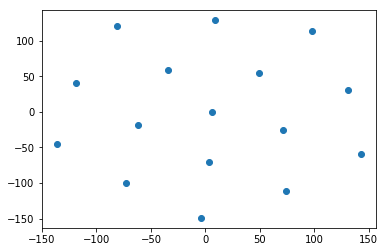

In [5]:
scatter(res[:,0],res[:,1]);

It's hard to assess how good this actually is, but the points seem nicely scattered, which is what we'd expect given the fact we started with a more-or-less random set of points.

*For later use:*

These are some simple "hello world" type functions included so that we can easily check from KNIME that the import has worked.

In [6]:
def say_hello():
    return 'hello'
def say_goodbye():
    return 'goodbye'
